# Project 3


### Galina Solovyeva

In [3]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

## Part 1. Load Dataset

#### 1.1 Let's load the dataset and check the first five rows

In [8]:
%

 Volume in drive C is OS
 Volume Serial Number is AABA-70D3

 Directory of c:\Users\korol_000\DS\DS-14-GS

08/27/2016  01:01 PM    <DIR>          .
08/27/2016  01:01 PM    <DIR>          ..
08/27/2016  12:57 PM    <DIR>          .ipynb_checkpoints
07/31/2016  08:27 PM            13,725 DS_Project_1.ipynb
08/18/2016  07:15 PM           135,648 DS-DC-14_03-statistics-fundamentals-part-1 (1).ipynb
08/01/2016  09:17 PM           135,648 DS-DC-14_03-statistics-fundamentals-part-1.ipynb
08/01/2016  06:35 PM            31,881 DS-DC-14_03-statistics-fundamentals-part-1_GS.ipynb.txt
08/03/2016  08:35 PM           323,175 DS-DC-14_04_statistics_fundamentals_part_2.ipynb
08/08/2016  06:38 PM            30,548 DS-DC-14_05-data-science-tools.ipynb
08/13/2016  11:46 AM           516,569 DS-DC-14_06_intro_to_regression_analysis.ipynb
08/22/2016  10:40 PM           163,054 DS-DC-14_09_intro_to_logistic_regression-GS.ipynb
08/08/2016  08:41 PM                21 newfile.md
08/07/2016  11:51 AM          

In [6]:
# load data
df = pd.read_csv("assets/datasets/admissions.csv")

# check head
df.head()

IOError: File assets/datasets/admissions.csv does not exist

## Part 2. Pre-Process Data

#### 2.1 Check and remove missing values
**Reading**: Read Pandas docs on handling missing values:
[http://pandas.pydata.org/pandas-docs/stable/missing_data.html](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [23]:
# check for missing values in each column before dropping
print "Missing values:"
print df.isnull().sum()

Missing values:
admit       0
gre         2
gpa         2
prestige    1
dtype: int64


In [24]:
# drop missing values if there are any
if df.isnull().sum().sum():
    print "There are missing values"
    df = df.dropna()
    print "Missing values dropped"

There are missing values
Missing values dropped


In [25]:
# re-check for missing values in each column after dropping
print "Missing values:"
print df.isnull().sum()

Missing values:
admit       0
gre         0
gpa         0
prestige    0
dtype: int64


#### 2.2 Check and convert all data types to numerical

In [26]:
# check data types
print df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object


In [60]:
# practicing a different approach to the below
df.select_dtypes(include=['number']).columns

Index([u'admit', u'gre', u'gpa', u'prestige_1.0', u'prestige_2.0',
       u'prestige_3.0', u'prestige_4.0'],
      dtype='object')

In [55]:
# Get numerical columns
num_cols = set(df.dtypes[((df.dtypes=="int64")|(df.dtypes=="float64"))].index)
non_cols = set(df.columns)-num_cols

print "Numerical columns:"
print num_cols
print "Non-numerical columns:"
print non_cols

# here all columns are numeric; no need to convert

Numerical columns:
set(['prestige_4.0', 'prestige_1.0', 'gpa', 'admit', 'gre', 'prestige_2.0', 'prestige_3.0'])
Non-numerical columns:
set([])


#### 2.3 Check and create dummy variables for categorical features
**Reading**: API Docs for `get_dummies()`:
[http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [28]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [2]:
# create dummy variables for `prestige` feature
# this check allows this code to be run multiple times
if 'prestige' in df.columns:
    # get dummy variables for prestige
    df = pd.get_dummies(df, columns==['prestige'])
    # remove prestige column
    df.drop(['prestige'], axis=1, inplace=True)

NameError: name 'df' is not defined

In [31]:
# check for newly added columns
df.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,0.0,1.0,0.0
1,1,660.0,3.67,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,0.0,1.0


## Part 3. Cross Validation

#### 3.1 Create separate training and test sets
**Reading**:

Read Scikit docs on cross validation:
[http://scikit-learn.org/stable/modules/cross_validation.html](http://scikit-learn.org/stable/modules/cross_validation.html)

Read Scikit docs on `sklearn.cross_validation.train_test_split()`:
[http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [32]:
# set X and y
X = df.drop(['admit'], axis=1)
y = df['admit']

In [33]:
# create separate training and test set with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4,random_state=0)

In [34]:
# check size of training set
print X_train.shape, y_train.shape

# check size of test set
print X_test.shape, y_test.shape

(238, 6) (238L,)
(159, 6) (159L,)


## Part 4. Build Model

#### 4.1 Build KNN Classifier
**Reading**: Read Scikit docs for `sklearn.neighbors.KNeighborsClassifier`:
[http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier)

In [35]:
# instantiate knn classifier using default params
knn = neighbors.KNeighborsClassifier()

# train knn classifier on training set
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
neighbors.KNeighborsClassifier()

#### 4.2 Evaluate Model
**Reading**: Read Scikit docs on evaluating models: [http://scikit-learn.org/stable/modules/model_evaluation.html](http://scikit-learn.org/stable/modules/model_evaluation.html)

In [36]:
# check model accuracy on test set
accuracy = knn.score(X_test, y_test)
print "Accuracy: " + str(accuracy)

Accuracy: 0.666666666667


**Reading**: Read Scikit docs on confusion matrix: [http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

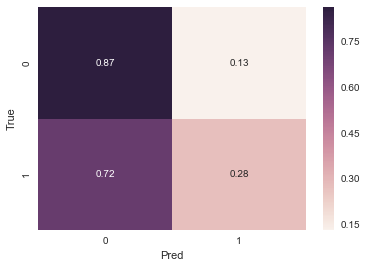

[[91 14]
 [39 15]]


In [37]:
# Get confusion matrix on test set
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

## Part 5. Tune Model

#### 5.1 Perform Grid Search for `n_neighbors`
**Reading**: Read Scikit docs for `sklearn.grid_search.GridSearchCV`:
[http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html)

In [77]:
# set list of values to grid search over
k = range(2, 25)
params = {'n_neighbors': k}

# perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params)
gs.fit(X_train, y_train)

# get best value to use
gs.best_params_, gs.best_score_

({'n_neighbors': 14}, 0.70168067226890751)

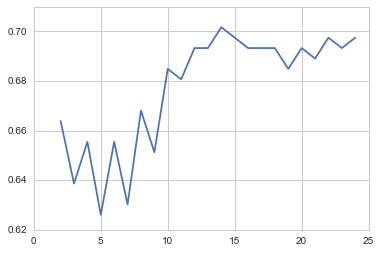

In [78]:
# plot search values vs. grid scores
plt.plot(k, [s[1] for s in gs.grid_scores_])

#### 5.2 Update model using best `n_neighbors`

In [79]:
# instantiate knn classifier using updated params
knn = neighbors.KNeighborsClassifier(n_neighbors=14)

# train updated knn classifier on training set
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

#### 5.3 Evaluate updated model

In [80]:
# check updated model accuracy on test set
accuracy = knn.score(X_test, y_test)
print "Accuracy: " + str(accuracy)

Accuracy: 0.672955974843


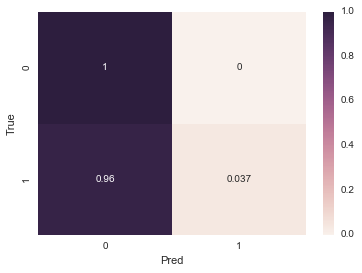

[[105   0]
 [ 52   2]]


In [81]:
# Get confusion matrix on test set
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

**Note** This is not a good model. Perhaps the data set is too small or the features themselves do not have enough predictive capability. However, the steps taken in this project are valid and applicable to future classifications problems.

**Question** Based on the confusion matrix above, does the model have type I errors or type II errors?

**Answer:** It looks like the model has type II errors, because it shows a high number of false negatives. It is predicting that 52 people were not admitted when they in fact were admitted.